### Visual Environmental Perception For Autonomous Road Vehicles

Autonomous vehicles and robots are becoming more prevalent in complex transportation environments. 

This includes self-driving cars, small versatile autonomous mobile delivery units, industrial and domestic mobile robots, and other yet to be imagined personal transport vehicles, mobile utilitarian robots, and autonomous terrain based forms.

To reliably and safely traverse their environments, each type of autonomous mobile unit needs to perceive exactly where the navigatable area is.

For autonomous highway vehicles this can include roadways, off-road surfaces and other drivable areas in parking lots, garages or structures. An autonomous mobile delivery robot, on the other hand, will have a greater range of possible drivable surfaces than self-driving cars. These units need to perceive sidewalks, curbs, crosswalks, pathways, ramps, flooring, and other interior areas.

Additionally, autonomous vehicles and robots must identify and locate many different types of dynamic and static objects on or immediately adjacent to the current or planned pathways.

What they have in common are several important aspects of environmental perception:

- Where are the actual traversable surfaces and their delimiting boundaries?
- Where and what are the dynamic and static objects in the immediate surroundings?
- How can the object detections be validated with a reliable degree of accuracy?

The first two are integral parts of the perception stack in motion planning. They are important for Go-To-Goal (GTG) behaviors when executing a planned trajectory and for obstacle avoidance (OA) or other behavior switching maneuvers to avoid collisions.

And, with ever increasing complexity not only in static environments, but also in the rapidly changing urban dynamic of other vehicles, pedestrians, bicyclists, and in industrial settings, workers, transport units, and other autonomous mobile robots, the third aspect of perception is essential to guarantee navigation without collision and with the highest priority on safety.

A frequently used method to validate the object detections is with semantic segmentation. Does the category determined by the detector match the semantic prediction for the object in the bounding box region?

But, there is another important and possibly overlooked aspect of semantic validation that needs to be emphasized.
What if the category returned by the object detector positively matches the category indicated in the semantic segmentation but both are wrong?  This is the case where the validation seems to be true, but instead double false positives affirmatively match each other resulting in a validated object that is completely erroneous. How is it possible to determine if both the detection category and the semantic category are wrong because they are both right? 

This project explores these aspects of visual perception methods for autonomous road vehicles using semantic segmentation and has two main sections structured as follows:

**Finding and delimiting drivable surfaces**

- Estimate the 3D drivable surface
- Approximate the actual driving lane with delimiting linear boundaries 


**2D Object detection and validation**

- Evaluate the validity of output from 2D object detectors with semantic segmentation
- Calculate minimal distance to impact by determining how far obstacles are from the autonomous vehicle
- Use approximate dimensions of objects to further validate predicted categories from semantic segmentation
- Find possible unknown obstacles previously unidentified or unclassified as objects to avoid potential collisions
- Suggest possible metrics to gauge and predict the reliably of the semantic validation.



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Visual-Environmental-Perception-For-Autonomous-Road-Vehicles" data-toc-modified-id="Visual-Environmental-Perception-For-Autonomous-Road-Vehicles-0.1">Visual Environmental Perception For Autonomous Road Vehicles</a></span></li></ul></li><li><span><a href="#1---Visualize-main-image-components" data-toc-modified-id="1---Visualize-main-image-components-1">1 - Visualize main image components</a></span><ul class="toc-item"><li><span><a href="#1.1---Current-scene" data-toc-modified-id="1.1---Current-scene-1.1">1.1 - Current scene</a></span></li><li><span><a href="#1.3---Depth-map" data-toc-modified-id="1.3---Depth-map-1.2">1.3 - Depth map</a></span></li><li><span><a href="#1.4---Segmentation" data-toc-modified-id="1.4---Segmentation-1.3">1.4 - Segmentation</a></span><ul class="toc-item"><li><span><a href="#Segmentation-Category-Mappings:" data-toc-modified-id="Segmentation-Category-Mappings:-1.3.1">Segmentation Category Mappings:</a></span></li></ul></li></ul></li><li><span><a href="#2---Finding-the-drivable-region-with-Semantic-Segmentation" data-toc-modified-id="2---Finding-the-drivable-region-with-Semantic-Segmentation-2">2 - Finding the drivable region with Semantic Segmentation</a></span><ul class="toc-item"><li><span><a href="#2.1---Calculate-3D-coordinates-for-all-pixels-in-the-image" data-toc-modified-id="2.1---Calculate-3D-coordinates-for-all-pixels-in-the-image-2.1">2.1 - Calculate 3D coordinates for all pixels in the image</a></span></li><li><span><a href="#2.2---Check-coordinates-calculated-to-see-if-they-match-the-image" data-toc-modified-id="2.2---Check-coordinates-calculated-to-see-if-they-match-the-image-2.2">2.2 - Check coordinates calculated to see if they match the image</a></span></li><li><span><a href="#2.3---A-visual-verification-of-the-(x,y,z)-coordinates" data-toc-modified-id="2.3---A-visual-verification-of-the-(x,y,z)-coordinates-2.3">2.3 - A visual verification of the (x,y,z) coordinates</a></span></li><li><span><a href="#2.4---Estimating-The-Ground-Plane-with-RANSAC:" data-toc-modified-id="2.4---Estimating-The-Ground-Plane-with-RANSAC:-2.4">2.4 - Estimating The Ground Plane with RANSAC:</a></span></li><li><span><a href="#2.5---RANSAC-algorithm-implementation" data-toc-modified-id="2.5---RANSAC-algorithm-implementation-2.5">2.5 - RANSAC algorithm implementation</a></span></li><li><span><a href="#2.6---Create-a-segmentation-mask-for-the-road-surfaces" data-toc-modified-id="2.6---Create-a-segmentation-mask-for-the-road-surfaces-2.6">2.6 - Create a segmentation mask for the road surfaces</a></span></li><li><span><a href="#2.7---Visualize-the-drivable-surfaces" data-toc-modified-id="2.7---Visualize-the-drivable-surfaces-2.7">2.7 - Visualize the drivable surfaces</a></span></li><li><span><a href="#2.7---3D-Birds-Eye-View-Of-The-Surfaces" data-toc-modified-id="2.7---3D-Birds-Eye-View-Of-The-Surfaces-2.8">2.7 - 3D Birds-Eye View Of The Surfaces</a></span></li></ul></li><li><span><a href="#3---Delimiting-the-drivable-lane" data-toc-modified-id="3---Delimiting-the-drivable-lane-3">3 - Delimiting the drivable lane</a></span><ul class="toc-item"><li><span><a href="#3.1---Find-potential-lane-boundaries-with-edge-detection-and-line-extraction" data-toc-modified-id="3.1---Find-potential-lane-boundaries-with-edge-detection-and-line-extraction-3.1">3.1 - Find potential lane boundaries with edge detection and line extraction</a></span></li><li><span><a href="#3.2---Visualize-segmentation-mask-for-lane-boundaries" data-toc-modified-id="3.2---Visualize-segmentation-mask-for-lane-boundaries-3.2">3.2 - Visualize segmentation mask for lane boundaries</a></span></li><li><span><a href="#3.3---Visualize-detected-lane-edges" data-toc-modified-id="3.3---Visualize-detected-lane-edges-3.3">3.3 - Visualize detected lane edges</a></span></li><li><span><a href="#3.4---View-all-detected-edge-lines-on-the-image" data-toc-modified-id="3.4---View-all-detected-edge-lines-on-the-image-3.4">3.4 - View all detected edge lines on the image</a></span></li><li><span><a href="#3.5---Merging-and-Filtering-Lane-Lines:" data-toc-modified-id="3.5---Merging-and-Filtering-Lane-Lines:-3.5">3.5 - Merging and Filtering Lane Lines:</a></span></li><li><span><a href="#3.6---Filtering-and-merging-potential-lane-line-results" data-toc-modified-id="3.6---Filtering-and-merging-potential-lane-line-results-3.6">3.6 - Filtering and merging potential lane line results</a></span></li><li><span><a href="#3.7---Image-best-potential-lane-lines-on-the-driving-scene" data-toc-modified-id="3.7---Image-best-potential-lane-lines-on-the-driving-scene-3.7">3.7 - Image best potential lane lines on the driving scene</a></span></li><li><span><a href="#3.8---Combine-and-extrapolate-to-actual-delimiting-lane-lines" data-toc-modified-id="3.8---Combine-and-extrapolate-to-actual-delimiting-lane-lines-3.8">3.8 - Combine and extrapolate to actual delimiting lane lines</a></span></li><li><span><a href="#3.9---Image-the-bounding-lane-lines-on-the-driving-scene" data-toc-modified-id="3.9---Image-the-bounding-lane-lines-on-the-driving-scene-3.9">3.9 - Image the bounding lane lines on the driving scene</a></span></li></ul></li><li><span><a href="#4---Minimum-Distance-To-Possible-Impacts-using-2D-Object-Detections" data-toc-modified-id="4---Minimum-Distance-To-Possible-Impacts-using-2D-Object-Detections-4">4 - Minimum Distance To Possible Impacts using 2D Object Detections</a></span><ul class="toc-item"><li><span><a href="#4.1---Flitering-for-semantic-validation-of-detections:" data-toc-modified-id="4.1---Flitering-for-semantic-validation-of-detections:-4.1">4.1 - Flitering for semantic validation of detections:</a></span></li><li><span><a href="#4.2---Visualize-detected-objects-and-validations" data-toc-modified-id="4.2---Visualize-detected-objects-and-validations-4.2">4.2 - Visualize detected objects and validations</a></span></li><li><span><a href="#4.3---Estimating-Minimum-Distance-To-Impact:" data-toc-modified-id="4.3---Estimating-Minimum-Distance-To-Impact:-4.3">4.3 - Estimating Minimum Distance To Impact:</a></span></li><li><span><a href="#4.4---Distance,-length,-and-object-detections" data-toc-modified-id="4.4---Distance,-length,-and-object-detections-4.4">4.4 - Distance, length, and object detections</a></span></li><li><span><a href="#4.5---Visualize-the-objects" data-toc-modified-id="4.5---Visualize-the-objects-4.5">4.5 - Visualize the objects</a></span></li><li><span><a href="#4.6---Visual-objects-in-the-scene" data-toc-modified-id="4.6---Visual-objects-in-the-scene-4.6">4.6 - Visual objects in the scene</a></span></li><li><span><a href="#4.6---Revalidation-by-length" data-toc-modified-id="4.6---Revalidation-by-length-4.7">4.6 - Revalidation by length</a></span></li></ul></li></ul></div>

In [1]:
#mk
#v0.23

import numpy as np
import cv2
from matplotlib import pyplot as plt
from m6bkv001 import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(1)

import sys
#print(sys.version)

import warnings
# all off
warnings.filterwarnings("ignore")
# then back  on 
#warnings.filterwarnings("default")

#np.set_printoptions(precision=2, threshold=np.nan)

## 1 - Visualize main image components


In [2]:
#init the data & image handler
dataset_handler = DatasetHandler()

The dataset handler contains three test data frames that are indexed as {0,1,2}. Each frames contains:
- DatasetHandler().rgb: a camera RGB image 
- DatasetHandler().depth: a depth map for the image (in meters)
- DatasetHandler().segmentation: an image containing the output of a semantic segmentation neural network as the category per pixel. 
- DatasetHandler().object_detection: array of detected 2D bounding boxes for the scene frame


In [3]:
#######################################################
############# set current working frame here ##########

dataset_handler.set_frame(1) 

#######################################################

#print()
#print("Current image frame #: "+str(dataset_handler.current_frame))
#print()


### 1.1 - Current scene


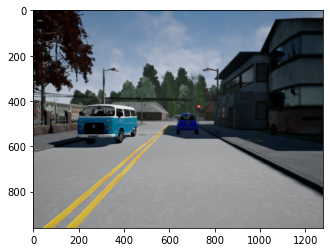

In [4]:

# take a look at the RGB image of the scene
image = dataset_handler.image
plt.imshow(image)


### 1.3 - Depth map

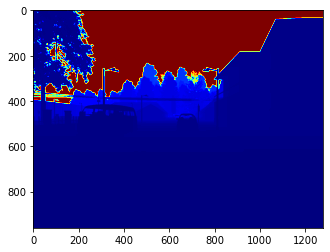

In [5]:
# take a look at the depth map

depth = dataset_handler.depth
plt.imshow(depth,cmap='jet')#(depth/1000)*256,cmap='jet')

#print(depth.shape)

### 1.4 - Segmentation

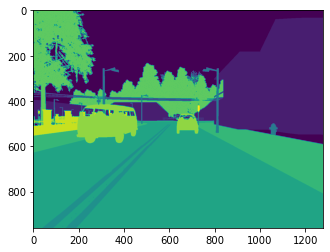

In [6]:
# sem seg map

segmentation = dataset_handler.segmentation
plt.imshow(segmentation)


#### Segmentation Category Mappings:
The segmentation images contain mapping indices from each pixel to a road scene category.
To better visualize the semantic segmentation for only categories of interest, these values are remapped to different colors. 

|Category |Mapping Index| Visualization Color|
| --- | --- | --- |
| Other| 0 | Navy Blue |
| Buildings | 1 | Red |
| Pedestrians | 4 | Teal |
| Poles | 5 | White |
| Lane Markings | 6| Purple |
| Roads | 7 | Blue |
| Side Walks| 8 | Yellow |
| Vehicles| 10 | Green |



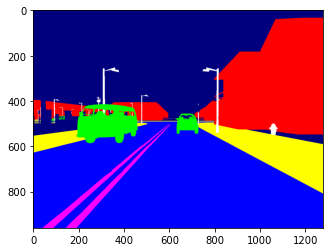

In [7]:
# the color-coded seg map

colored_segmentation = dataset_handler.visualize_segmentation(segmentation)

plt.imshow(colored_segmentation)

## 2 - Finding the drivable region with Semantic Segmentation

### 2.1 - Calculate 3D coordinates for all pixels in the image

The 3D coordinates are in the camera coordinate frame.

The equations to calculate the  3D coordinates are:

$$z = depth $$

$x = \frac{(u - c_u) * z}{f_x} \tag{1}$

$y = \frac{(v - c_v) * z}{f_y} \tag{2}$

$c_u$, $c_v$, and $f_x$, $f_y$ are the intrinsic calibration parameters found in the camera calibration matrix K:

$$K = \begin{pmatrix} f_x & 0 & c_u \\ 0 & f_y & c_v \\ 0& 0 & 1 \end{pmatrix}$$

***Note***: fx and fy are often the same but not always so specify


In [8]:
# take a look at the intrinsic matrix K

K = dataset_handler.k
print();print(K);print()



[[640   0 640]
 [  0 640 480]
 [  0   0   1]]



In [9]:
def xy_from_depth(depth, K):
    """
    calc (x,y) coordinates (in camera frame) for each pixel in the image
    using the depth map for z coords and K intrinsic (calibration) matrix

    Arguments:
    depth -- array (H, W), contains a depth value (in meters) for image pixels

    Returns:
    X -- array (H, W) x coordinates in the camera coord frame for each pixel 
    Y -- array (H, W) y coordinates in the camera coord frame for each pixel 
    """
    #  caps in notation for matrices & 2d arrays 
    # lower case for vectors & scalars
    
     #vectorized version
    
    Z = depth
    h,w = Z.shape
    
    cu = K[0,2]
    cv = K[1,2]
    
    f = K[0,0] #focal length
    # note  fx & fy not always the same
    fx = K[0,0]
    fy = K[1,1]
    
    # construct [H x W] array grids of image coordinates (u,v)
    
    u = np.linspace(1,w,w) # cols (width)
    v = np.linspace(1,h,h) # rows (height)
    U,V = np.meshgrid(u,v)
    
    X = ((U-cu) * Z)/fx
    Y = ((V-cv) * Z)/fy
  
    return X, Y


### 2.2 - Check coordinates calculated to see if they match the image

In [10]:

# check some sample (x,y,z) outputs


K = dataset_handler.k

z = dataset_handler.depth

x, y = xy_from_depth(z, K)

LRU = x.shape[0]-1
LRV = x.shape[1]-1

print()
print("This is one way to check the semantic segmentation and depth map")
print("against the image. See if the distances and dimensions seem to fit the scene")
print()
print("Check coorespondence to intrinsics");print()
print("Apx Cu in K or u0: " + str((LRU//2)+1))
print("Apx Cv in K or v0: " + str((LRV//2)+1))
print()

print()
print("Check some sample camera frame coordinates that were generated")
print("")


print("Note that the camera coordinate frame has the positive y axis pointing down")
print("So positive (x,y,z) is (right,down,forward) from the camera's POV")
print()
print("(x,y,z) coordinates of upper-left corner of image")
print()
print('x[0,0] = ' + str(x[0, 0]))
print('y[0,0] = ' + str(y[0, 0]))
print('z[0,0] = ' + str(z[0, 0]) + '\n')

print("(x,y,z) coordinates of lower-right corner of image")
print()
print('x[LRU,LRV] = ' + str(x[LRU,LRV]))
print('y[LRU,LRV] = ' + str(y[LRU,LRV]))
print('z[LRU,LRV] = ' + str(z[LRU,LRV]) + '\n')


print("(x,y,z) coordinates of center of image")
print()
print("The (x,y) should be (0,0) since this is the center of the camera coordinate frame.")
print("And the z coordinate is the distance of whatever is directly ahead in the image")
print()

u0=LRU//2
v0=LRV//2


print('x[u0,v0] = ' + str(x[u0,v0]))
print('y[u0,v0] = ' + str(y[u0,v0]))
print('z[u0,v0] = ' + str(z[u0,v0]) + '\n')




This is one way to check the semantic segmentation and depth map
against the image. See if the distances and dimensions seem to fit the scene

Check coorespondence to intrinsics

Apx Cu in K or u0: 480
Apx Cv in K or v0: 640


Check some sample camera frame coordinates that were generated

Note that the camera coordinate frame has the positive y axis pointing down
So positive (x,y,z) is (right,down,forward) from the camera's POV

(x,y,z) coordinates of upper-left corner of image

x[0,0] = -998.4375
y[0,0] = -748.4375
z[0,0] = 1000.0

(x,y,z) coordinates of lower-right corner of image

x[LRU,LRV] = 1.7710000000000001
y[LRU,LRV] = 1.32825
z[LRU,LRV] = 1.771

(x,y,z) coordinates of center of image

The (x,y) should be (0,0) since this is the center of the camera coordinate frame.
And the z coordinate is the distance of whatever is directly ahead in the image

x[u0,v0] = 0.0
y[u0,v0] = 0.0
z[u0,v0] = 13.506



### 2.3 - A visual verification of the (x,y,z) coordinates

A visual verification to double check the (x,y,z) coordinates can be made by taking a look at what is straight ahead of the camera center



Take a look at what is straight ahead of the camera with close-ups
The distance is 13.51 meters to whatever is directly at camera coordinate (x,y,z)=(0,0,z)
There can be other objects in the scene that are closer or more distant than this exact point


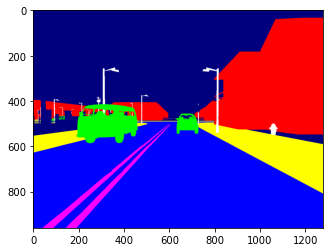

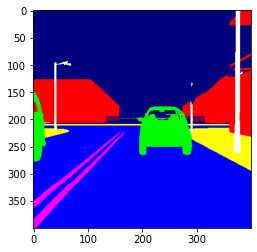

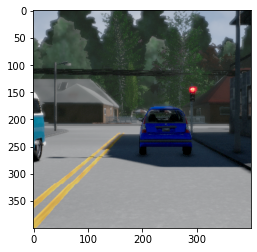

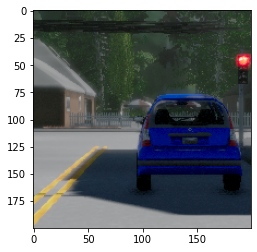

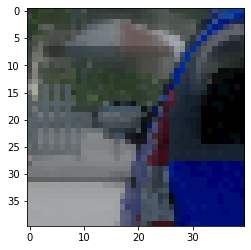

In [11]:
print()
print("Take a look at what is straight ahead of the camera with close-ups")
print("The distance is "+str(round(z[u0,v0],2))+" meters to whatever is directly at camera coordinate (x,y,z)=(0,0,z)")
print("There can be other objects in the scene that are closer or more distant than this exact point")

w=200

plt.figure()
plt.imshow(colored_segmentation)

plt.figure()
plt.imshow(colored_segmentation[u0-w:u0+w,v0-w:v0+w])

plt.figure()
plt.imshow(image[u0-w:u0+w,v0-w:v0+w])

w=int(w/2)
plt.figure()
plt.imshow(image[u0-w:u0+w,v0-w:v0+w])

w=int(w/5)
plt.figure()
plt.imshow(image[u0-w:u0+w,v0-w:v0+w])

#plt.imshow(image)

#bbox_image=seg_map[ymin:ymax,xmin:xmax]


### 2.4 - Estimating The Ground Plane with RANSAC:

For self-driving cars and other autonomous vehicles including autonomous mobile robots, drivable space includes any space that the ego-vehicle is physically capable of traversing. The estimated drivable space is the area that can be reached by a ground plane in the scene. The ground plane and parameters for the plane equation can be derived by fiting the plane model to the best set of (x,y,z) coordinates that are closest to what would be considered to be drivable surfaces. For a self-driving car, these would be the roads, parking lots, etc. For an autonomous mobile delivery robot they could be sidewalks, pathways, parking lots, entry ways, and possibly an occasional road for crossing intersections. 

Finding the best traversable areas and delimiting them into realistic paths for navigation is a multi-stage process. It begins with masking out the areas from the semantic segmantion map. Then using only these corresponding pixel locations from the image to form a set of (x,y,z) points in the 3D space of the camera frame. The plane equation model is run against this point set and optimized to the best fit. This would be the closest set of points within a preset threshold to this planar subregion of the visible environment. 

This is done with a basic implemtation of RANSAC to approximate the ground plane. Outliers are rejected when the 3D points are too far away from the selected regions used for the plane model. The best inlier set is the inlier set with the maximum number of inlier points found  that has at least a preset number of points or a set percentage of the total number of points for the selected drivable region.This best set is kept to fit the final model run. But, if the maximum number of iterations was reached first, then the algoritm bails out and just returns the model parameters run against the best inlier set found so far.

The plane equation is the standard for 3 dimensional space: ax + by + cz + d = 0

In general, relatively level surface gound planes don't require an astronomically large set of points to fit a 3D plane equation. But there can be variations depending on the selection of required surfaces and the quality of visual images of the enviroment (scene) and the accuracy of their corresponding semantic segmentations.

The defaults are for a very minimal case. Parameters are available to fine tune the RANSAC algorithm for a best result balanced with runtime requirements.

If the algoritm runs to exhaustion, it bails out at a fixed maximum number of iterations

Runtime readouts are provided


Basic RANSAC algorithm for plane estimation

       0: given a set of points to fit the plane model with

       1: Get a random sample of these points (to run the model on)
          and compute plane model

       2: Find valid inliers for each point NOT in random sample
          subset (this is the test set) by checking that distances to current 
          model of ground plane are within a preset threshold
        
       3: Check if the current number of inliers is greater than all previous
          iterations
          
       4: If so then keep current inlier set as the best 
          along with the plane fit parameters that generated it

       5: Check if stopping criterion is met and if so break to 7:
       
       6: Otherwise continue with 1: until max number of iterations is met
        
       7: Recompute plane parameters from the best inlier batch and return it
    


### 2.5 - RANSAC algorithm implementation

In [12]:
def ransac_plane_fit(points, fixed_num_samples=None, min_num_inliers=None, \
                     max_iterations=None, verbose=True):
    """
    v0.18
    
    allows choice of parameters:
        minimun required inliers
        fixed  number of samples to fit model on
        max number of iterations
        verbose mode can be set to show progress & stats of run
        
    Computes plane coefficients a,b,c,d of the plane in the form ax+by+cz+d = 0
    using RANSAC algorithm for outlier rejection

    Arguments:
    points --  (3, N), contains all data points for random sampling 

    Returns:
    output_plane --  (1, 4) vector of the plane equation parameters a,b,c,d 
    """
    if verbose==True:
        print()
        print("RANSAC: START")
        print("calculating...",end=' ')
          
    # runtime parameters
    
    #default
    if (max_iterations==None):
        max_iterations = 3  # RANSAC maximum number of iterations
    if (max_iterations <=0): max_iterations=3
        
    #sample_percent = 0.000
        
    #fixed_num_inliers = 0 # if 0 => use percent
  
    
    if (fixed_num_samples==None):
         num_samples = 15 # if 0 => use percent
        #num_samples = int(sample_percent*points.shape[1])
    else:
        num_samples=fixed_num_samples #from function call
    
    
    min_inliers_percent = 0.50 
    
    if (min_num_inliers == None):
        min_req_inliers = int(min_inliers_percent*points.shape[1]) # RANSAC minimum number of inliers
    else:
        min_req_inliers = np.abs(min_num_inliers)
    
    
    distance_threshold = 0.01 # Maximum distance from point to plane for point to be considered inlier
   
    # the sample space is basically a training set for the model
    # and the non-sample points are the test set; keep them partitioned
    
    # num_samples=int(0.001*points.shape[1]) # take a percentage
    
    # INIT
    current_max_inliers = 0
    best_inlier_set = []
    
    # out of curiosity
    # road percentage of total image pixels
    road_point_percent=points.shape[1]/(image.shape[0]*image.shape[1])

    for i in range(max_iterations):
        
        if verbose==True:
            print('*',end=' ') #progress indicator
          
        # 1: 
        # get a random sample of points to run model on

        # random index into points
        index = np.random.choice(points.shape[1], num_samples, replace=False)
       
        samples = points[:,index]
        
        # 2: 
        # Compute plane model
        plane=compute_plane(samples)
        
        # 3: 
        # find valid inliers
        # for each point NOT in random sample subset (ie this is a test set)
        # check distances to ground plane against threshold
   
        inliers = []
        
        for p in range(points.shape[1]):
            # test with points not in samples
            if (p not in index):
                x,y,z = points[:,p]
                # save ok point to inliers
                if dist_to_plane(plane,x,y,z) < distance_threshold:
                    inliers.append(points[:,p])
                    
        # 4: 
        # Check if the current number of inliers is greater than all previous
        # iterations and keep the best inlier set with the largest number of points

        # keep the best plane fit parameters so far
        # and best inlier set
        
        if len(inliers) > current_max_inliers:
            
            current_max_inliers = len(inliers)
            current_best_plane=plane
            best_inlier_set = inliers
        
        # 5: # EXIT CONDITION
        # Check if stopping criterion is met and break 
        
        if current_max_inliers > min_req_inliers:
            break
              
    # break out of or fell through iteration loop here


    # recompute plane parameters from 
    # the best inlier batch & return it
        
    output_plane=compute_plane(np.array(best_inlier_set).T)
    #out=output_plane
    if verbose==True:
        print()
        print("RANSAC: END");print()
        print("# of iterations run: "+str(i+1))
        print("# fixed samples: "+ str(fixed_num_samples))
        print("min % inliers required: "\
              +str( round((min_req_inliers/points.shape[1]) *100))+str(" %"))
        
        if (fixed_num_samples == 0):
            print("# percentage samples: "+ str(sample_percent))
            
        print("actual # samples used: "+str(num_samples))
        print("max # inliers found: "+str(len(best_inlier_set)))
        percent = int((len(best_inlier_set)/points.shape[1])*100)
        print("inliers % of points processed: "+str(percent)+" %")
        
        print()
    
    return output_plane 

### 2.6 - Create a segmentation mask for the road surfaces

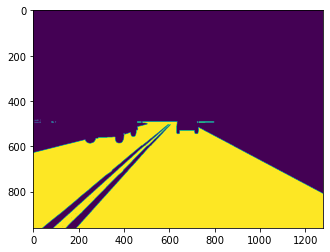

In [13]:
# create pixel mask for road surfaces 

road_mask = np.zeros(segmentation.shape)
road_mask[segmentation == 7] = 1 # 7 is road surfaces

# take a look to check road mask
plt.imshow(road_mask)

# Get (x,y,z) coordinates of pixels in road mask
x_ground = x[road_mask == 1]
y_ground = y[road_mask == 1]
z_ground = dataset_handler.depth[road_mask == 1]

xyz_ground = np.stack((x_ground, y_ground, z_ground))

In [14]:
# run ransac run
# 
#p_final = ransac_plane_fit(xyz_ground)

min_inliers=int(0.65*xyz_ground.shape[1]) 
                      
p_final = ransac_plane_fit(xyz_ground, fixed_num_samples=15, min_num_inliers=min_inliers)
                      
######
print('Ground Plane equation cooeficients [a,b,c,d]: ' + str(p_final))
print()
print("If the drivable region is a relatively level surface expect to see something close to:")
print();print("[0, -1, 0, +d] or [0, 1, 0, -d]");print() 


#print("Note: the positive (+) y-axis direction is below the camera center ")
#print("where the road needs to be!")


RANSAC: START
calculating... * 
RANSAC: END

# of iterations run: 1
# fixed samples: 15
min % inliers required: 65 %
actual # samples used: 15
max # inliers found: 436967
inliers % of points processed: 99 %

Ground Plane equation cooeficients [a,b,c,d]: [-1.85511792e-05  9.99868369e-01  1.62248329e-02 -1.35721154e+00]

If the drivable region is a relatively level surface expect to see something close to:

[0, -1, 0, +d] or [0, 1, 0, -d]



### 2.7 - Visualize the drivable surfaces 

Verify the estimated plane is by visualizing the surfaces generated
by the the plane equation calculated on the best inlier set found by RANSAC.


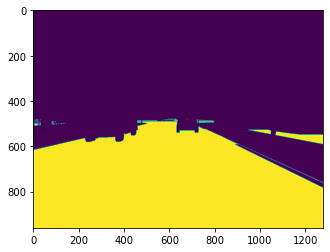

In [15]:

dist = np.abs(dist_to_plane(p_final, x, y, z))

ground_mask = np.zeros(dist.shape)

ground_mask[dist < 0.1] = 1
ground_mask[dist > 0.1] = 0


#plt.imshow(road_mask)

plt.imshow(ground_mask)

### 2.7 - 3D Birds-Eye View Of The Surfaces 

Visualize the estimated drivable space in 3D.</br>

This is a top-down view of the surfaces generated by the plane equation


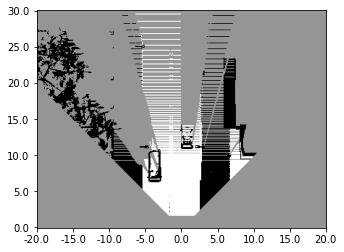

In [16]:
dataset_handler.plot_free_space(ground_mask)

## 3 - Delimiting the drivable lane
The semantic segmentation of the image can be used to estimate the lane boundaries of the current driving lane of the autonomous vehicle. This is done by masking out previously semantically labeled objects in the image that could possibly delimit the drivable lane. Then the modified image is processed by edge detection and line extraction algorithms to generate a set of potential lines that can be reduced by filtering, clustering, and extension into the minimal number of lines required to bound the lane on both sides of the vehicle.



### 3.1 - Find potential lane boundaries with edge detection and line extraction

The procedure for finding a set of possible lane lines to eventually be reduced to the actually boundaries for navigation is:

1) Create an image mask from previously semantically labeled objects in the image that could possibly delimit the drivable lane. For instance areas that are labled as lane markings and sidewalks.

2) Attenuate possible inherent noise in the image with a Gaussian filter

3) Detect edges with the Canny algorithm

4) Extract lines from the edges with the Hough algorithm

5) Visualize the results to see how well the runtime parameters for the algorithms have done and adjust if required




In [17]:
def estimate_lane_lines(segmentation_image):
    """
    Estimates lines belonging to lane boundaries
    Multiple lines could correspond to a single lane

    Arguments:
    segmentation_image -- array (H,W), containing semantic segmentation neural network output
    #not used - minLineLength -- scalar,the minimum line length
    #not used - maxLineGap -- dimension (Nx1), containing the z coordinates of the points

    Returns:

    lines -- array (N, 4) containing lines in the form of 
    [x_1, y_1, x_2, y_2], [x_1,y_1] and [x_2,y_2] are
    the coordinates of two points on the line in the (u,v)  image coordinate frame
    
    edges_image - edge detections 
    
    boundary_mask - mask used for edge detection processing
    
    """

    # create an image with pixels belonging to lane boundary categories from 
    # the output of semantic segmentation 
    # make boundary mask from segmentation output
    # for pixels with values
    # 6 == lane markings
    # 8 == sidewalks

    boundary_mask = np.zeros(segmentation_image.shape,dtype='uint8')
    boundary_mask[segmentation_image == 6] = 255 # lane markings
    boundary_mask[segmentation_image == 8] = 255 # sidewalks

    # take a look
    #plt.imshow(boundary_mask)
    
    boundary_mask = cv2.GaussianBlur(boundary_mask,(5,5),1)
   
    #  Edge Detection  
    
    #edges_image = cv2.Canny(boundary_mask,127,255)#,apertureSize=3, L2gradient=True) )
    # this one for vw van et al
    edges_image = cv2.Canny(boundary_mask.astype(np.uint8),100,110,apertureSize=3)#, L2gradient=True) )
    
    #plt.imshow(edges_image)
    
    # Line estimation  

    lines = cv2.HoughLinesP(edges_image, rho=1, theta=(np.pi/180), \
             threshold=80, minLineLength=30, maxLineGap=10) #gap was 5
    #  try these also th=100, min=100,maxline = 25
    
    #  make dimensions of returned lines  [N x 4]
    
    lines=np.squeeze(lines, axis = 1)
   
    return lines, edges_image, boundary_mask


In [18]:

# get lane lines coords, lane edges image & lane boundary mask image
lane_lines, edges_image, lane_boundary_mask = estimate_lane_lines(segmentation)


### 3.2 - Visualize segmentation mask for lane boundaries

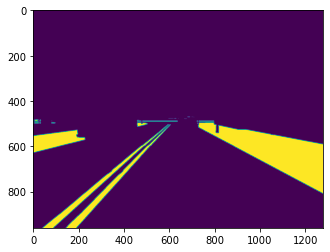

In [19]:
#print(lane_lines.shape)

#print();print("lane boundary mask")
plt.imshow(lane_boundary_mask)

#plt.imshow(dataset_handler.vis_lanes(lane_lines))


### 3.3 - Visualize detected lane edges 

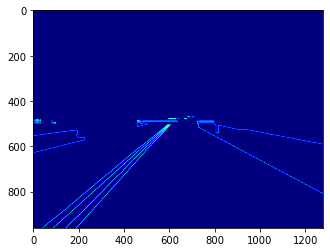

In [20]:
# take a look at what edge detector found from lane mask
#print();print("lane edges detected");print()
plt.imshow(edges_image,cmap='jet')

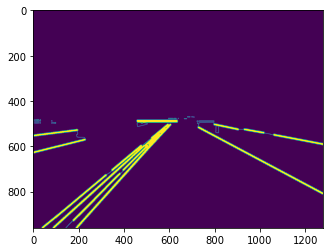

In [21]:
# lane lines supperimposed on edge detections

plt.imshow(dataset_handler.visualize_lanes(lane_lines,edges_image))


### 3.4 - View all detected edge lines on the image


Number of potential lane lines found: 26



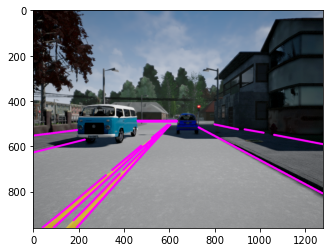

In [22]:
# show detected lanes on image
print()
print("Number of potential lane lines found: "+str(lane_lines.shape[0]))
print()

plt.imshow(edges_image)

plt.imshow(dataset_handler.visualize_lanes(lane_lines))



### 3.5 - Merging and Filtering Lane Lines:

The potential delimiting lines can be reduced by filtering, clustering, and extension into the minimal number of lines required to bound the lane on either side of the vehicle. This is usually a maximum of two delimiting lane lines.

The basic algorithm design is:

1. Filter out any horizontal lines or lines that are very near horizontal by finding lines with slopes less than a horizontal slope threshold

2. From the remaining lines, filter out the ones that would be outside best candidate lane delimiting lines. For instance, on the other side of a walkway from the curb side. 

4. Group lines into actual clusters based on slope and intercept proximity to centroids of possible clusters

5. Reduce the number of lines in each cluster into a minimum with mean averaging

The implementation is a readable and somewhat basic list oriented algorithm.

In [23]:
def merge_lane_lines(lines, verbose=True):
    """
    1) filters horizontal or very-near horizontal lane lines based on a minimum slope threshold
    2) Merges lane lines to output a single line per lane using  basic clustering of lines
        determined by the nearness of the slope and intercept about centroids 

    Arguments:
    lines -- array (N, 4) containing lines in the form of [x_1, y_1, x_2, y_2],
    that are the coordinates of two points on each line

    Returns:
    merged_lane_lines -- array  (N, 4) containing lines in the form of [x_1, y_1, x_2, y_2],
    the coordinates of two points on each line
    """

    # set thresholds
    
    #mk this is ok for horizontal-like lines
    # >0.1 near and actual horizontal
    # >0.2 catches  upper part other side sidewalk
    # >0.3 works
    
    lane_slope_threshold = 0.3
    
    # line clustering
    cluster_slope_threshold = 0.15 #0.3 #apx in [0,0.3]
    cluster_intercept_threshold = 35 ##  apx in [20,50]
    
    slopes, intercepts = get_slope_intecept(lines) # this function is from loaded module
    if (verbose is True):
        print();print("Number of potential lines reduce to lane lines: "+str(len(lines))) 
    
    # weed out horizontals & non-lane boundary lines
    
    lane_boundary_lines=[]
    
    for i in range(len(slopes)):
        if abs(slopes[i]) > lane_slope_threshold:#0.3:#:2: #0.1: 
            lane_boundary_lines.append(lines[i])
    
    slopes, intercepts = get_slope_intecept(np.array(lane_boundary_lines))
    
    # testing
    #a=intercepts; a.sort()
    
    # while there are remaining lines to cluster
    # Iterate over remaining slopes and intercepts 
    # and cluster lines that are close to each other using a slope 
    # and intercept threshold
    if (verbose is True):
        print("Number of lines after filtering out horizontals & non-boundary lines: "+str(len(lane_boundary_lines)))
        print();print("Building clusters from "+str(len(lane_boundary_lines))+" lines");print()

    slopes = list(slopes)
    intercepts = list(intercepts)
    
    line_clusters=[] # the BIG LIST
    
    # build clusters and save them in a list
    
    while len(lane_boundary_lines)> 0:
        
        #print("BEGIN  - len lane boundary lines "+str(len(lane_boundary_lines)))

        # test first , randomize later
        #rdx = len(lane_boundary_lines)//2
        rdx = int(np.random.choice(list(range(len(lane_boundary_lines))), size=1, replace=False))
        #print(rdx)
        
        center_line = lane_boundary_lines.pop(rdx)
        center_slope = slopes.pop(rdx)
        center_intercept = intercepts.pop(rdx)
    
        cluster = [] # building this cluster
        cluster.append(center_line) # starting with centroid
    
        indexes_remove=[] # to remove lines, etc already used in clustering
        #print("BEFORE cluster search - # boundary lines "+str(len(lane_boundary_lines)))
         
        for i in range(len(slopes)):
        
            if abs(slopes[i]-center_slope) < cluster_slope_threshold \
                and abs(intercepts[i]-center_intercept) < cluster_intercept_threshold:
                
                    cluster.append(lane_boundary_lines[i])
                    indexes_remove.append(i)
                
        # done building this cluster so save it
        
        line_clusters.append(cluster)
        
        # build new list of lines to cluster

        new_lane_boundary_lines=[]
        new_slopes=[]
        new_intercepts=[]
        
        for i in range(len(lane_boundary_lines)):
            if i not in indexes_remove:
               #print("ADDING "+str(i))
               new_lane_boundary_lines.append(lane_boundary_lines[i])
               new_slopes.append(slopes[i])
               new_intercepts.append(intercepts[i])
        
        lane_boundary_lines=new_lane_boundary_lines
        slopes=new_slopes
        intercepts=new_intercepts
        
        if (verbose is True):
            print("lines remaining to clusterize: "+str(len(lane_boundary_lines)))
            
    if (verbose is True):       
        print();print("Number of clusters created: "+str(len(line_clusters)))
        print()
    
    # do until run out of lines not previously used & removed
    # to fetch next center and build another cluster
   
    # Merge all lines in clusters using mean averaging
    # or just grab the middle line per cluster for now
    
    merged_lane_lines=[]
    
    for i in range(len(line_clusters)):
        mid=len(line_clusters[i])//2
        merged_lane_lines.append(line_clusters[i][mid])
    
    # dimensions of returned lines is [N x 4]
    merged_lane_lines=np.array(merged_lane_lines)
    
    #plt.imshow(dataset_handler.vis_lanes(merged_lane_lines))

    return merged_lane_lines


### 3.6 - Filtering and merging potential lane line results

In [24]:

# cluster lane lines

merged_lane_lines = merge_lane_lines(lane_lines)

print("Number of reduced cluster lines: "+str(len(merged_lane_lines)))




Number of potential lines reduce to lane lines: 26
Number of lines after filtering out horizontals & non-boundary lines: 19

Building clusters from 19 lines

lines remaining to clusterize: 16
lines remaining to clusterize: 10
lines remaining to clusterize: 5
lines remaining to clusterize: 1
lines remaining to clusterize: 0

Number of clusters created: 5

Number of reduced cluster lines: 5


### 3.7 - Image best potential lane lines on the driving scene

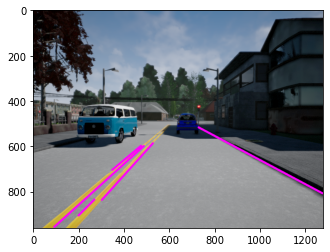

In [25]:

plt.imshow(dataset_handler.visualize_lanes(merged_lane_lines))


### 3.8 - Combine and extrapolate to actual delimiting lane lines

- From the remaining clusters extrapolate lane lines from front to end of road lane.
- Then get the closest inner lane lines to delimit the drivable lane boundaries on both sides

In [26]:
# from the clusters extrapolate lane lines from front to end of road lane
# then get the closest inner lane lines to delimit the lane
# these delimit the drivable lane boundaries on both sides

max_y = dataset_handler.image.shape[0]
min_y = np.min(np.argwhere(road_mask == 1)[:, 0])

extrapolated_lanes = extrapolate_lines(merged_lane_lines, max_y, min_y)

final_lanes = find_closest_lines(extrapolated_lanes, dataset_handler.lane_midpoint)


### 3.9 - Image the bounding lane lines on the driving scene

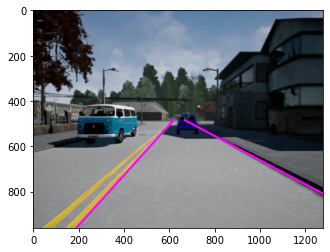

In [27]:
plt.imshow(dataset_handler.visualize_lanes(final_lanes))


## 4 - Minimum Distance To Possible Impacts using 2D Object Detections

Motion planning and obstacle avoidance behavior with autonomous road vehicles and the ability to generate trajectory profiles or react immediately depends on the accuracy of distance measurements to objects in the drivable lane.

Minimum distances to impact can be calculated to objects that have been identified by 2D object detections from a convolutional neural net (ConvNet). 

But, the ability to reliably use these distances depends on the validity of the object detections. If the 2D detections are from a high recall, but low precision 2D object detector, then bounding boxes may have been supplied that have erroneous object classifications. 

It is possible to use corresponding semantic segmentation images of the scene to validate the detected object categories.

But what if the semantic segmentation map is also wrong, but positively matches the category of the object detection? Using an approximation of the length of the object can be useful to possibly flag the double (but mutually true) false positives.


The following sections will be used explore these areas:

- Use semantic segmentation to check the detected object classification</br>


- Determine approximate object lengths to see if they are within a general range for the object category</br>


- Find the minimal distance to impact for the validated objects



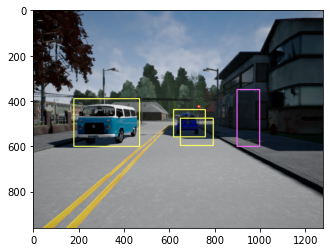

In [28]:
detections = dataset_handler.object_detection

plt.imshow(dataset_handler.visualize_object_detections(detections))

The detections are in the form: [category, x_min, y_min, x_max, y_max, score]. The category string is the object classification of what is contained in the bounding box. For instance: 'Car', 'Pedestrian' or 'Cyclist'. The bounding box coordinates are [x_min,y_min] the coordinates of the top left corner, and [x_max,y_max] the coordinates of the bottom right corner. The score is a predicted probability for the category.


In [29]:
print(detections)

[['Pedestrian' '900.0' '350.0' '1000.0' '600.0' '0.74']
 ['Car' '180.0' '390.0' '470.0' '600.0' '0.68']
 ['Car' '620.0' '438.0' '760.0' '558.0' '0.98']
 ['Car' '650.0' '476.0' '795.0' '596.0' '0.98']]


### 4.1 - Flitering for semantic validation of detections:

The semantic segmentation map for images can be used to filter out unreliable or erroneous detections.

- For each detection, calculate what percentage of total pixels in the bounding box that actually belong to the category predicted by the object detector.</br>


- If the percentage is above a set threshold then keep the detection, otherwise discard it.


In [30]:
def filter_detections_by_segmentation(detections, segmentation, ratio_threshold=0.5):
    """
    Filter 2D detection output based on a semantic segmentation map.

    Arguments:
    detections -- array(N, 5) containing detections bounding boxes
    in the form of [Class, x_min, y_min, x_max, y_max, score]
    
    segmentation_output -- array (HxW) containing pixel category labels
    
    Returns:

    valid_detections -- array (N, 5) containing semantically filtered detections boundry boxes
    in the form of [Class, x_min, y_min, x_max, y_max, score]
    
    bbox_images -- a list bounding box images used to check validity
    
    valid_object_images -- a list bounding box images determined to be valid
    """

    # this is an extended segmap based on carla simulator values
    # and additional labels used for this project
    # this is the semantic one not the color mapped one
    # the category numbers are the same but the color maps differently in segmentation images
    #
    seg_map_categories = {     'None' : 0,
                               'Background' : 0,
                               'Buildings' :  1,
                               'Fences' : 2,
                               'Other' : 3,
                               'Pedestrian' : 4,
                               'Pedestrians' : 4,
                               'Poles' :  5, 
                               'Lane Markings' : 6, 
                               'Roads' : 7,  
                               'Sidewalks' : 8,
                               'Vegetation' : 9,
                               'Vehicles' :  10, 
                               'Car' : 10,
                               'Cyclist' : 10,
                               'Walls' : 11,
                               'Traffic Signs' : 12 } 
     
    
    
    seg_map=segmentation
    # Set ratio threshold:
    ratio_threshold = 0.3  # valid detection if 1/3 of the total pixels are in predicted category 
   
    # extended bounding boxes
    valid_detections = []
    valid_object_images = []
    bbox_images=[] # to keep bbox subimages 
    
    for detection in detections:
        
        bbox=np.asfarray(detection[1:5]).astype(int)
    
        xmin=bbox[0]
        ymin=bbox[1]
        xmax=bbox[2]
        ymax=bbox[3]  #xmin,xmax,ymin,ymax
        
        width = xmax - xmin
        height = ymax - ymin
        #area=width*height  # width,height,area
   
        bbox_category=detection[0]
        
        #total_category_pixels=0
 
        category_number = seg_map_categories[bbox_category]

        # save to get a visual on the bounding boxes images processed
        bbox_image=seg_map[ymin:ymax,xmin:xmax] # get subarray

        # vectorized version
        bbox_mask=np.zeros((height,width)) 
        bbox_mask[seg_map[ymin:ymax,xmin:xmax] == category_number] = 1 #just add em up
        # => div total cat pixels by area (in pixels)
        category_percentage=np.sum(bbox_mask)/(bbox_mask.shape[0]*bbox_mask.shape[1])
           
        bbox_images.append(bbox_image) #save the images 
              
        if (category_percentage > ratio_threshold):
            valid_detections.append(detection)
            valid_object_images.append(bbox_image)
            
    return valid_detections, valid_object_images, bbox_images 

In [31]:

filtered_detections, valid_object_images,bbox_images = filter_detections_by_segmentation( \
                                                        detections, segmentation, \
                                                        ratio_threshold=0.7)

# number of boxes checked
print()
print("Number of objects checked for validity: "+str(len(bbox_images)))
print("Number of objects determined to be valid dectections: "+str(len(filtered_detections)))



Number of objects checked for validity: 4
Number of objects determined to be valid dectections: 2


### 4.2 - Visualize detected objects and validations


The full segmentation image


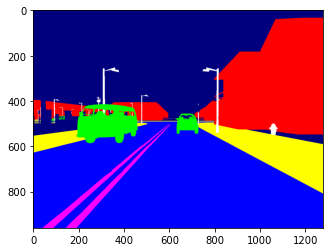

In [32]:
print()
print("The full segmentation image")
# look at what was proecessed first
plt.imshow(colored_segmentation)


List all detected objects processed:


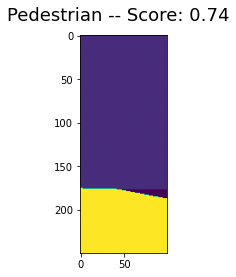

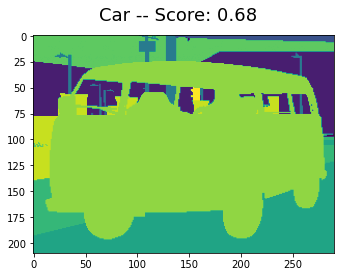

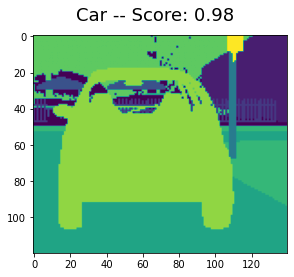

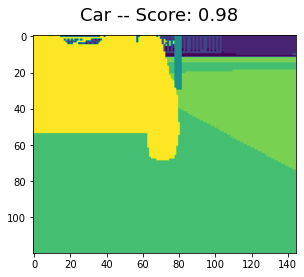

In [33]:
print()
print("List all detected objects processed:")

for image,detection in zip(bbox_images,detections):
    fig=plt.figure()
    fig.suptitle(detection[0]+" -- Score: "+str(detection[5]),fontsize=18)
    plt.imshow(image)
    


Semantically validated detected objects


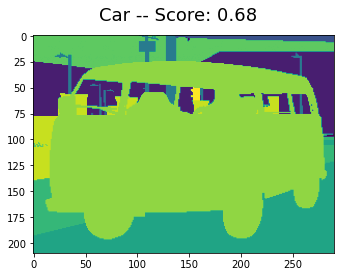

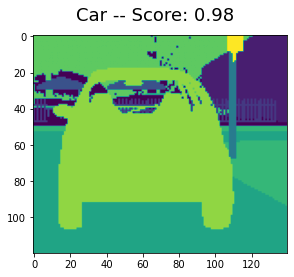

In [34]:
print()
print("Semantically validated detected objects")

for image,detection in zip(valid_object_images, filtered_detections):
    fig=plt.figure()
    fig.suptitle(detection[0]+" -- Score: "+str(detection[5]),fontsize=18)
    plt.imshow(image)
    

### 4.3 - Estimating Minimum Distance To Impact:

Several distance and measurements are estimated:

Minimum distance to the semantically identified object in the bounding boxes 

Minimum distance for everything in the scene captured within the box. 

Approximate length of the detected object.

Distances are computed from the camera center (0,0,0) to the (x,y,z) coordinates in the camera frame of what is represented by pixel locations within the bounded images. 

The following equation is used: $  distance = \sqrt{x^2 + y^2 + z^2}$.


In [35]:
def find_min_distance_to_detection(detections, x, y, z):
    """
    Filter 2D detection output based on a semantic segmentation map

    Arguments:
        
    detections -- list (N, 5) containing detections in the form of 
    [Class, x_min, y_min, x_max, y_max, score].
    
    # (x,y,z) coordinates in camera frame for each pixel in image
    x -- array (H, W)  
    y -- array (H, W) 
    z -- array (H,W) 
    
    Returns:
    min_bbox_distances  array (N, 1) containing distance to impact 
                 for entire bbox 

    min_object_distances  array (N, 1) containing distance to impact 
                 for only detected object in the bbox
    """
    
    seg_map_categories = {     'None' : 0,
                               'Background' : 0,
                               'Buildings' :  1,
                               'Fences' : 2,
                               'Other' : 3,
                               'Pedestrian' : 4,
                               'Pedestrians' : 4,
                               'Poles' :  5, 
                               'Lane Markings' : 6, 
                               'Roads' : 7,  
                               'Sidewalks' : 8,
                               'Vegetation' : 9,
                               'Vehicles' :  10, 
                               'Car' : 10,
                               'Cyclist' : 10,
                               'Walls' : 11,
                               'Traffic Signs' : 12 } 
  
    min_bbox_distances=[] # min distance for all pixel locations in bbox
    min_object_distances=[] # min distances for only masked object in bbox
    object_lengths=[] # apx lengths for only masked object in bbox
    
    for detection in detections:
        
        # compute distance of each pixel
        # of the object in bounding box
        
        ##print();print("detection: ",detection)
        
        bbox_category=detection[0]
        bbox=np.asfarray(detection[1:5]).astype(int)
        ## print();print("bbox: ",bbox)
        
        category_number=seg_map_categories[bbox_category]
        
        xmin=bbox[0]
        ymin=bbox[1]
        xmax=bbox[2]
        ymax=bbox[3]  #xmin,xmax,ymin,ymax

        # only interested in bbox section of (x,y,z)
        X = x[ymin:ymax,xmin:xmax]
        Y = y[ymin:ymax,xmin:xmax]
        Z = z[ymin:ymax,xmin:xmax]
        
        bbox_seg_map=segmentation[ymin:ymax,xmin:xmax]
        #plt.imshow(bbox_seg_map)
        
        D = np.sqrt( X*X + Y*Y + Z*Z ) # distances for entire bounding box
    
        # use distances for object only not entire bounding box
        # NOTE: this is correct for vw van. output was
        # 4.27 meters, vw type 2 van is 4.28 M
        """
        The Volkswagen Type 2 has an overall length of 14'. 5” (4.28 m), wheelbase of 7' 10.5” (2.4 m), width of 5'8” (1.72 m), and height of 6' 4” (1.94 m).
        """
        # object only
        object_distances=D[bbox_seg_map == category_number] 
        
        min_object_distance=np.amin(object_distances)
        max_object_distance=np.amax(object_distances)
        
        # distances for entire bbox area 
        dmin=np.amin(D)
        dmax=np.max(D)
        
        min_object_distances.append(min_object_distance)
        ### test with this
        #min_object_distances.append(min_object_distance+0.1)
        
        #if (dmin != min_distance):
            #print();print("Possible problem with object detected")
            #print()
            
        # approximate distance from part of object is in view

        apx_object_length = max_object_distance-min_object_distance 
        object_lengths.append(apx_object_length)
        #print();print("Apx viewable front to back length: "+str(round(apx_object_length,2)))
        
        ## this is for entire bbox area not just object
        #min_bbox_distance=dmin
        # object only 
        min_bbox_distance=min_object_distance
        
        min_bbox_distances.append(min_bbox_distance)
        
    return np.array(min_bbox_distances), np.array(min_object_distances), np.array(object_lengths)


### 4.4 - Distance, length, and object detections

Ascertaining the distance to impact is an absolute priority for objects detected in the driving lane and in the immediate frontal vicinity so the driving behavior can be planned to avoid collisions.

But, this behavior is also dependent on knowing exactly what type of objects are present in the environment and with what degree of certainty the categorization can be used. The approximate length is another metric to consider in the validations of object detections.

What is imaged in the bounding box region is only the 2d projection from a 3d camera frame oriented world. Visible light projections through an aperture onto a 2d surface will retain linearity (unless there is radial distortion) but depth information is lost. The z coordinates are from a depth map representation of the image that can be provided using measurements from another sensor arrangement. For instance, a stereo camera setup.

Since the image is monocular, even if a car seems to be visible only as the rear of the vehicle directly ahead there may still be pixels related to the car body surfaces that are at the front but are hardly visible. By taking minimum and maximum distances of the corresponding depths all object pixels, the approximate longitudinal length can be extracted. 

An estimate of the length can be useful to further validate the accuracy of the object detection category. For instance, if a van is misclassified as a bicycle then the length will be too short, even if both the object category and the semantic segmentation category match a bicycle and it was given a another preliminary check with pixel area coverage within the bounding box. The length can compared to an average range of lengths for the object category. If it doesn't fit, then the detection can be flagged as questionable and unreliable. The distance to impact could still be used to some extent, but the behavioral response by the autonomous vehicle and its planned motion would have to be altered to react to an unidentified category object.


### 4.5 - Visualize the objects 

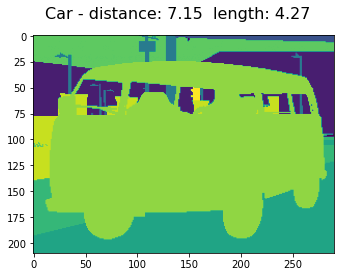

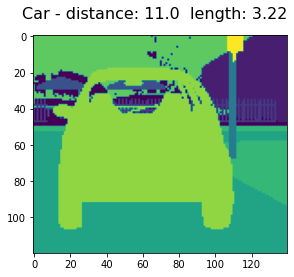

In [36]:

# both the min distance for entire bbox and the object only

min_bbox_distances, min_object_distances, object_lengths  = find_min_distance_to_detection(filtered_detections, x, y, z)

for min_object, min_bbox, object_length, image, detection in zip(min_object_distances, min_bbox_distances, object_lengths, valid_object_images, filtered_detections):
    fig=plt.figure()
    fig.suptitle(detection[0]+" - distance: "+str(round(min_object,2))\
                +"  length: "+str(round(object_length,2)),fontsize=16)#Score: "+str(detection[5])str(min_bbox_distances))
    plt.imshow(image)


### 4.6 - Visual objects in the scene 

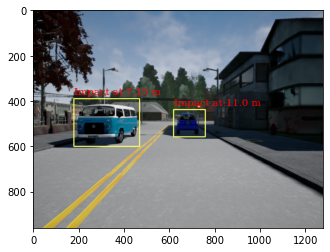

In [37]:
font = {'family': 'serif','color': 'red','weight': 'normal','size': 10}

im_out = dataset_handler.visualize_object_detections(filtered_detections)

for detection, min_distance in zip(filtered_detections, min_object_distances):
    bounding_box = np.asfarray(detection[1:5])
    plt.text(bounding_box[0], bounding_box[1] - 20, 'Impact at:' + str(np.round(min_distance, 2)) + ' m', fontdict=font)

#plt.figure(figsize=(4,3))#7, 5))#, dpi=100)
plt.imshow(im_out)

### 4.6 - Revalidation by length



The following  can be used to compare average minimum and maximum lengths (in meters) of objects detected to average ranges of lengths:


|Object| Min (m)|Max (m) |
| - | - | -|
|Car | 4.2 | 4.9|
|Urban Car| 2.7|4.0|
|Small Car| 3.8|4.1|
|Compact Car|  4.1|4.3|
|Sports Cars| 4.6|5.6|
|SUV| 4.3|4.7|
|Large SUV| 4.0|5.0|
|Truck| 5.2|5.7|
|VW Classic Type 2 Van|4.28|4.28|
|Motorcycle| 2.20|2.95|
|Person| 0.36|0.47|

